## Mariusz Mańka, Michał Hutnik
## Informatyka - niestajconarnie - V semestr 
## Wydział Matematyki Stosowanej
## Przedmiot: Języki Skryptowe w Analizie Danych
## Projekt Grupowy - Python

# Analiza przychodów wraz ze szczególnym rozróżnieniem czy dana osoba zarabia więcej niż 50 000 USD rocznie oraz do jakich grup społecznych należy.
**Dane w formacie CSV, użyte w tej analizie pochodzą ze strony: https://www.kaggle.com/uciml/adult-census-income  
oraz badają czy dana osoba zarabia powyżej 50 000 USD rocznie oraz jakie spełnia przy tym warunki.**

## Cel analizy:
Celem naszej analizy jest ustalenie do jakich grup należą oraz jakie warunki najczęściej spełniają osoby zarabiajace powyżej 50 000 rocznie. Chcemy ustalić przybliżony profil takiej osoby.


### Opis kolumn:
- **age** - `int64` - Wiek badanej osoby
- **workclass** - `string`- Forma zatrudnienia badanej osoby
- **fnlwgt** - `int64` - Szacowana liczba osób, które reprezentuje każdy wiersz danych (liczba osób o podobnym zestawie cech)
- **education** - `string` - Zdobyte wykształcenie
- **educational-num** - `int64` - Lata nauki
- **marital-status** - `string` - Stan cywilny
- **occupation** - `string` - Zawód wykonywany przez badaną osobę
- **relationship** - `string` - Relacje rodzinne badanej osoby
- **race** - `string` - Rasa
- **gender** - `string` - Płeć
- **capital-gain** - `int64` - Zysk kapitałowy
- **capital-loss** - `int64` - Strata kapitału
- **hours-per-week** - `int64` - Godziny pracy w tygodniu
- **native-country** - `string` - Kraj ojczysty
- **income_>50K** - `int64` - Informacja czy badana osoba osiągnęła zysk powyżej 50 000.
 


# Import niezbędnych bibliotek

In [1]:
install.packages("dplyr")


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
install.packages("corrplot")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
install.packages("ggcorrplot")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [4]:
library(dplyr)
library("corrplot")


In [5]:
library("ggcorrplot")    

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


### Pobieramy dane do dalszej obróbki wskazując że dane oddzielone są przecinkiem

In [7]:
df_income <- read.csv("https://community052.blob.core.windows.net/csvs/train.csv", header = TRUE, sep = ",")

### Przykładowa struktura bazy danych w postaci tabeli (pierwsze 40 rekordów)

In [43]:
head(df_income)

age,workclass,fnlwgt,education,educational.num,marital.status,occupation,relationship,race,gender,capital.gain,capital.loss,hours.per.week,native.country,income_.50K
67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
59,State-gov,105363,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,0


### Podstawowe informacje o strukturze danych:

In [42]:
summary(df_income)

      age                   workclass         fnlwgt       
 Min.   :17.00   Private         :30587   Min.   :  13492  
 1st Qu.:28.00   Self-emp-not-inc: 3464   1st Qu.: 117496  
 Median :37.00   Local-gov       : 2822   Median : 178100  
 Mean   :38.62                   : 2498   Mean   : 189673  
 3rd Qu.:48.00   State-gov       : 1756   3rd Qu.: 237671  
 Max.   :90.00   Self-emp-inc    : 1518   Max.   :1490400  
                 (Other)         : 1312                    
        education     educational.num               marital.status 
 HS-grad     :14197   Min.   : 1.00   Divorced             : 5971  
 Some-college: 9790   1st Qu.: 9.00   Married-AF-spouse    :   31  
 Bachelors   : 7219   Median :10.00   Married-civ-spouse   :20147  
 Masters     : 2392   Mean   :10.07   Married-spouse-absent:  570  
 Assoc-voc   : 1831   3rd Qu.:12.00   Never-married        :14513  
 11th        : 1647   Max.   :16.00   Separated            : 1361  
 (Other)     : 6881                   Widowe

### Unikalne wartości opisowe dla poszczególnych kolumn 


In [58]:
sapply(df_income,unique)

$age
 [1] 67 17 31 58 25 59 70 35 28 21 30 20 45 76 54 19 44 47 37 27 24 49 36 71 62
[26] 64 53 34 42 26 43 23 56 40 63 50 29 52 33 38 66 46 32 68 41 80 73 39 57 51
[51] 69 22 18 55 65 60 48 61 72 90 74 77 75 81 82 88 84 83 79 78 85 89 87 86

$workclass
[1] Private          State-gov        Self-emp-not-inc Federal-gov     
[5] Local-gov        Self-emp-inc                      Never-worked    
[9] Without-pay     
9 Levels:  Federal-gov Local-gov Never-worked Private ... Without-pay

$fnlwgt
    [1]  366425  244602  174201  110199  149248  105363  216390  361888   74784
   [10]  118089  138513  100252  241297   39764   30690  316185  110239  278076
   [19]  259169  136986  154227  117774  174308  189721  229125  341294  102583
   [28]   64874  129432  163331   38245  167816  152307  249087  136684  241126
   [37]  287277  188644  182833  434463  312818  173534  204235  193165  175133
   [46]  161538  177787  176280  174233  157893  296462  136951   87771  206008
   [55]  340288  124015  262777   82393  141875   60288  366088  254285  100734
   [64]  534775  189944  195727  160035  117778  199596  199444  211743   56121
   [73]  228723  131869  318382  130304  294913  147258  116539  168187  143189
   [82]  122493  215620  293828  129227  217652   58350  203003  432376  228230
   [91]  249332  198884  192602  146121  288983  186032  265579  180871  146196
  [100]  248568   31533  165867  122660  172246   45784  197290  264554   84954
  [109]  377107  226084  196385   59056  201217  437727  252752   20511  301638
  [118]  337195  164552  113870  173754  107548  185452  134829   40915  115562
  [127]  308028  234460  195770  276568  147612  103925   71151   33394  169589
  [136]  181242  144483  119751  174928  109097  272944  150211   32950  353352
  [145]  306646  176101  272185  132341  235109  200939  353358  282701  436253
  [154]  249046  204470   92141  910398  214385  109055  148644  241404  176244
  [163]   48214  168262   78530  190454   82161  213412   61343  161334  180599
  [172]  129528  139647  322691  251795  123612  185027  285897   37274  230899
  [181]  590941  115057  121040  193859  145112   99651   23157  323006  368797
  [190]  216137   95763  117037  206699  171231  347513   95680  104981  159522
  [199]  109849   33002  163885  211497  345259   73522  239708  199224  216469
  [208]  160151  355700   35166  321851   86153   98361  160120  147215  367200
  [217]  120539   82777  346783   60594  195258   32519  121694  130714  167670
  [226]  123306  194608  132718  289551  331539  188610   27484  338162  275848
  [235]  165474  103323  210875   98170   45604  654141  208874   27184  143110
  [244]  285294  152880  101320  653215   54342  280519  200727   27408  207213
  [253]  169323   71067  207172  222162  167832  220585  327060  148903  141076
  [262]  154076  195337   79529  186934  205359  199698  160594  147510  207685
  [271]   30828  239662  340269  200967  192973  206951  120601  158825  185041
  [280]   47261   75333  196001  141297  113099  162302  189762  189123  103257
  [289]  161745   43475  102791  379522  283724  159542  262043   99156  207819
  [298]  184543  201080  211392  230248  200448   34402   88808  167599  118376
  [307]  187119  328734  439263  265295  111900   32533   83783  347089  154604
  [316]  226135  207438   68882  219034  310014  385901  169512  440607  361561
  [325]  211128  263908  102350   85668  112797  184948  111377  345831  326334
  [334]   33521  221650  154891  163110  302770  161802  298489  182668   34029
  [343]  275093  173427  370274  482211   97723  189102  403344  189792  262877
  [352]  226505  321456  271828   56510  345253  133136  132686  311101  225291
  [361]  106566  172571  209674   39060  144594  297991  347445  456236  227429
  [370]  380357  176157  274577  119176  256979  358655  195409   19896  102423
  [379]  190625  202950  247337  248749   80680   34722  170617   68268  170915
  [388]  166330  216851  143123   41777  175686   42596  21830

# Podstawowe analizy:

In [ ]:
min(df_income$age)

In [10]:
max(df_income$age)

[1] 90

In [11]:
x = df_income %>%
count(gender)

### Wykres kołowy przedstawiający podział całego zbioru danych ze względu na płeć 

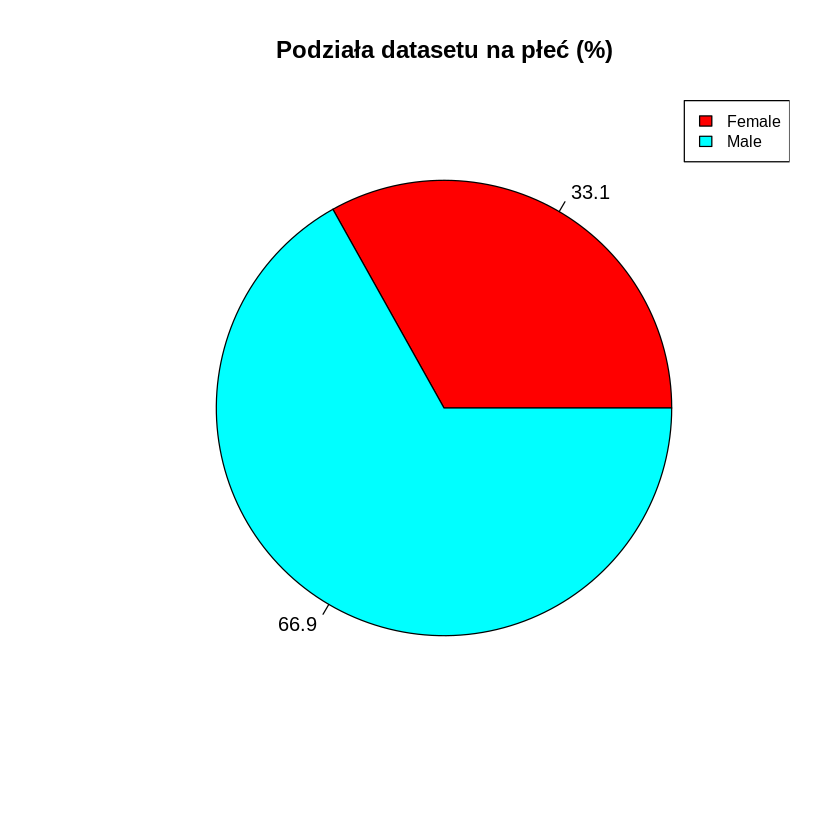

In [13]:
percentage <- round(100*x$n/sum(x$n), 1)
pie(x$n, labels = percentage, main="Podziała datasetu na płeć (%)", col = rainbow(length(x)))
legend("topright", c("Female","Male"), cex = 0.8,
   fill = rainbow(length(x)))

In [14]:
race = df_income %>%
count(race)

### Wykres kołowy przedstawiający podział całego zbioru danych ze względu na rasę


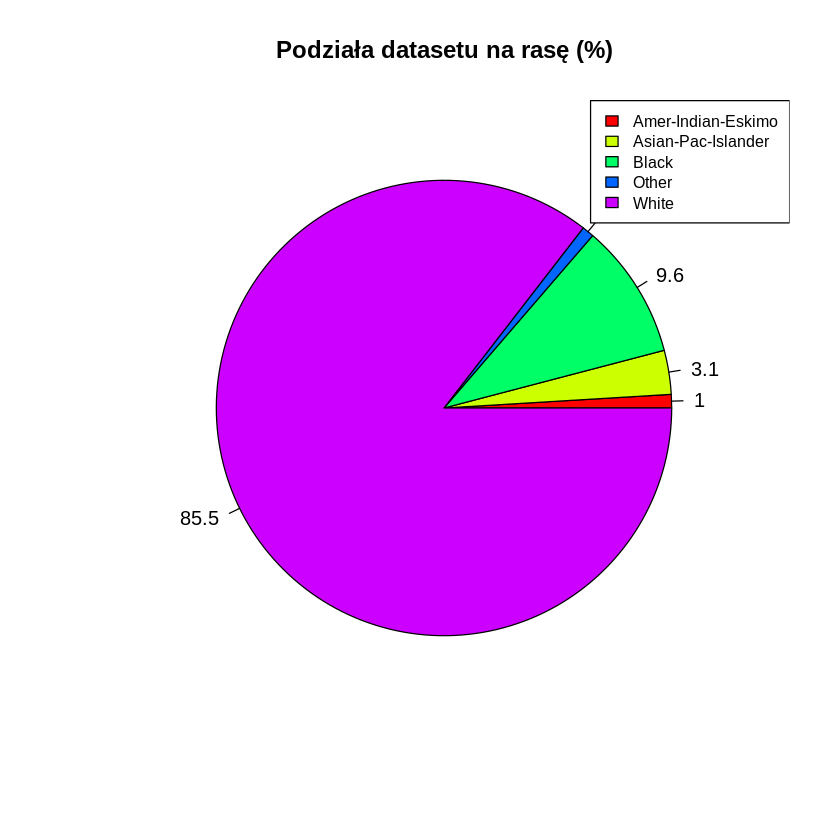

In [25]:
percentage <- round(100*race$n/sum(race$n), 1)
pie(race$n, labels = percentage,main="Podziała datasetu na rasę (%)", col = rainbow(length(percentage)))
legend("topright", c("Amer-Indian-Eskimo","Asian-Pac-Islander","Black","Other","White"), cex = 0.8,
   fill = rainbow(length(percentage)))

### Wykres słupkowy przedstawiający podział  całego zbioru ze względu na wiek
**Rozróżniliśmy 5 grup wiekowych:**
- 17 do 25 lat
- 26 do 35 lat
- 36 do 50 lat
- 51 do 68 lat
- oraz 68 i więcej

In [27]:
numbers <- c()
open_age <- c(17,26,36,51)
close_age <- c(25,35,50,68)
age_ranges <- c("17-25 lat","26-35 lat","36-50 lat","51-68 lat","68+ lat")
for(i in 1:length(open_age)){
    numbers <- append(x = numbers, values = count(filter(df_income, age>open_age[i] & age<close_age[i]))$n)
}
numbers <- append(x = numbers, values = count(filter(df_income, age>67))$n)

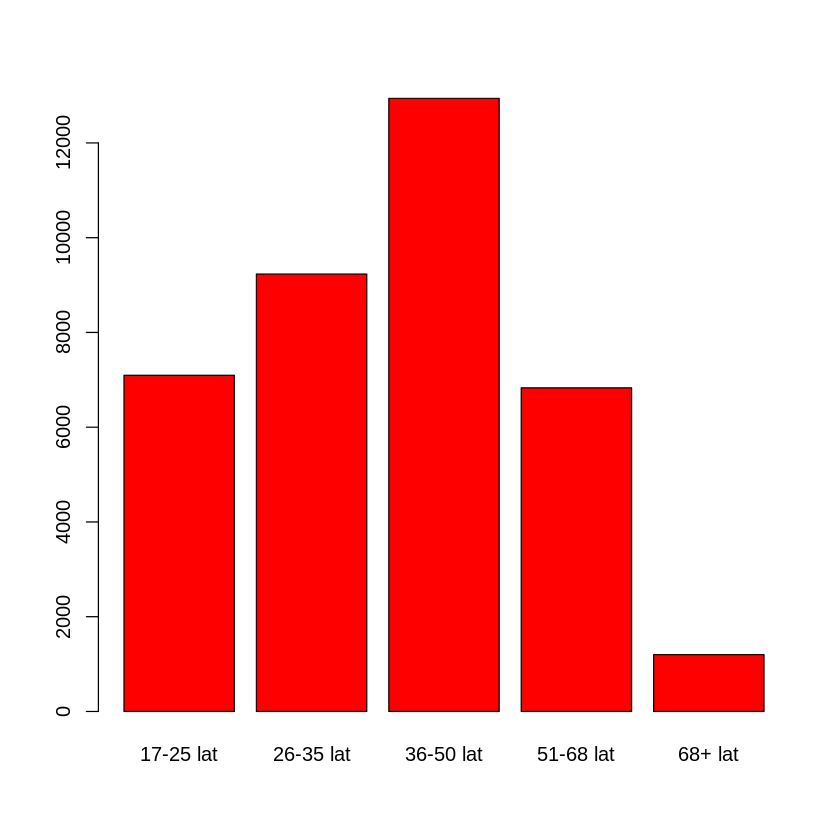

In [17]:
barplot(numbers, names.arg = age_ranges, col = "red")

### Wykres kołowy przedstawiający ilość osób zarabiających więcej niż 50 000 USD rocznie

In [32]:
data = count(df_income, income_.50K)
data[1, 1] <- "Mniej niż $50k"
data[2, 1] <- "Więcej niż $50k"

In [33]:
data

income_.50K,n
Mniej niż $50k,33439
Więcej niż $50k,10518


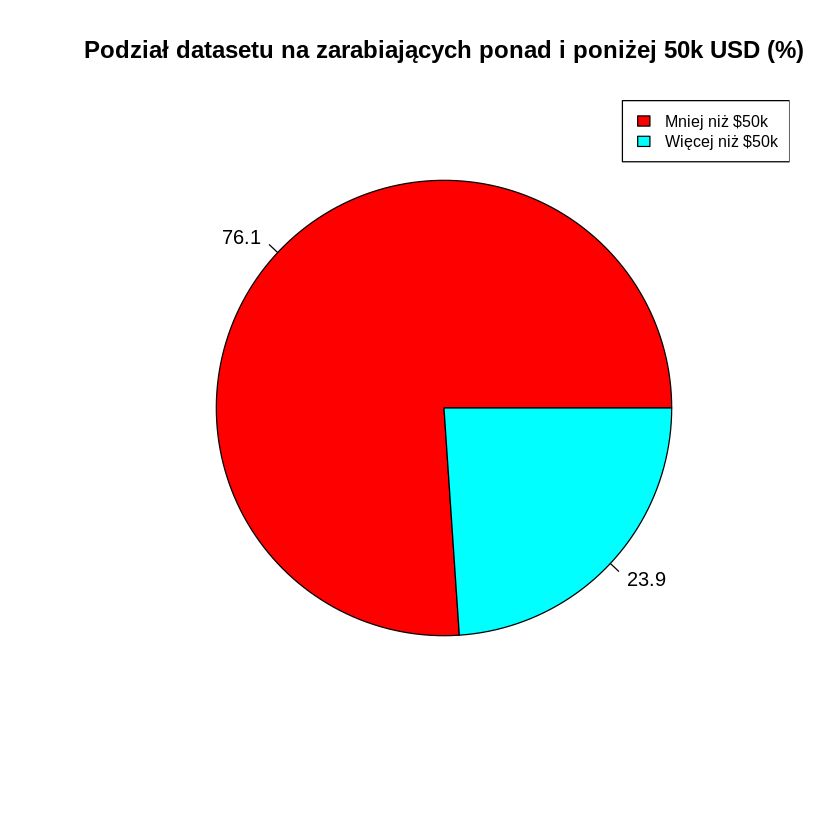

In [38]:
percentage <- round(100*data$n/sum(data$n), 1)
pie(data$n, labels = percentage, main="Podział datasetu na zarabiających ponad i poniżej 50k USD (%)", col = rainbow(length(percentage)))
legend("topright", c("Mniej niż $50k","Więcej niż $50k"), cex = 0.8,   fill = rainbow(length(percentage)))



### Macierz przedstawiająca korelacje kolumn między sobą
**Zbadajmy korelację kolumny Income>50k z pozostałymi, a by stwierdzić co ma największy wpływ na wysokie zarobki**

Jak widać największy wpływ na wysokie zarobki ma wykształcenie, a potem wiek oraz ilość godzin pracy w ciągu tygodnia. Jednak współczynnik korelacji to tylko około 0.4, więc jest to jednak dość niska wartość

In [35]:
print("zależność między przychodami a wiekiem:")
cor(x = df_income$age, y = df_income$income_.50K)
print("zależność między przychodami a wykształceniem:")
cor(x = df_income$educational.num, y = df_income$income_.50K)
print("zależność między przychodami a wiekiem:")
cor(x = df_income$hours.per.week, y = df_income$income_.50K)

[1] "zależność między przychodami a wiekiem:"


[1] 0.2309875

[1] "zależność między przychodami a wykształceniem:"


[1] 0.3340349

[1] "zależność między przychodami a wiekiem:"


[1] 0.2279181

### Wykres kołowy dzielący zbiór osób zarabiających POWYŻEJ 50 000 ze względu na wykonywany zawód

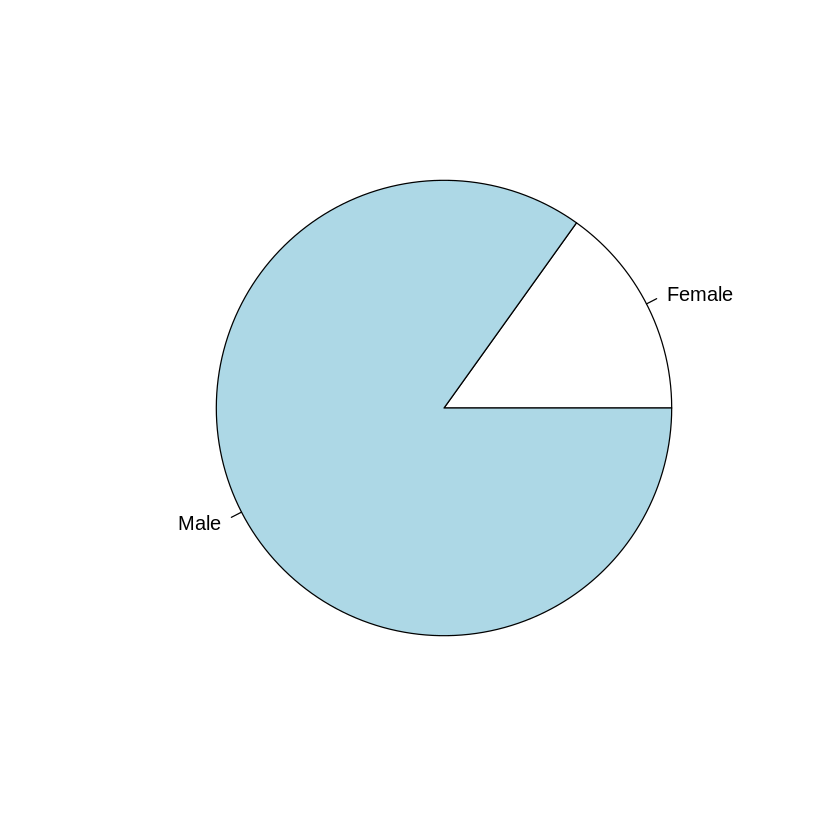

In [62]:
only_over_50k = filter(df_income, df_income$income_.50K > 0)
gender_with_more_than_50k = count(only_over_50k, gender)
pie(gender_with_more_than_50k$n, gender_with_more_than_50k$gender)

### Wykres słupkowy przedstawiający podział  osób z przychodem powyżej 50k ze względu na wiek
**Tak jak poprzednio w celu analizy rozróżniliśmy 5 grup wiekowych:**
- 17 do 25 lat
- 26 do 35 lat
- 36 do 50 lat
- 51 do 68 lat
- oraz 68 i więcej

In [22]:
numbers <- c()
open_age <- c(17,26,36,51)
close_age <- c(25,35,50,68)
age_ranges <- c("17-25 lat","26-35 lat","36-50 lat","51-68 lat","68+ lat")
for(i in 1:length(open_age)){
    numbers <- append(x = numbers, values = count(filter(only_over_50k, age>open_age[i] & age<close_age[i]))$n)
}
numbers <- append(x = numbers, values = count(filter(only_over_50k, age>67))$n)

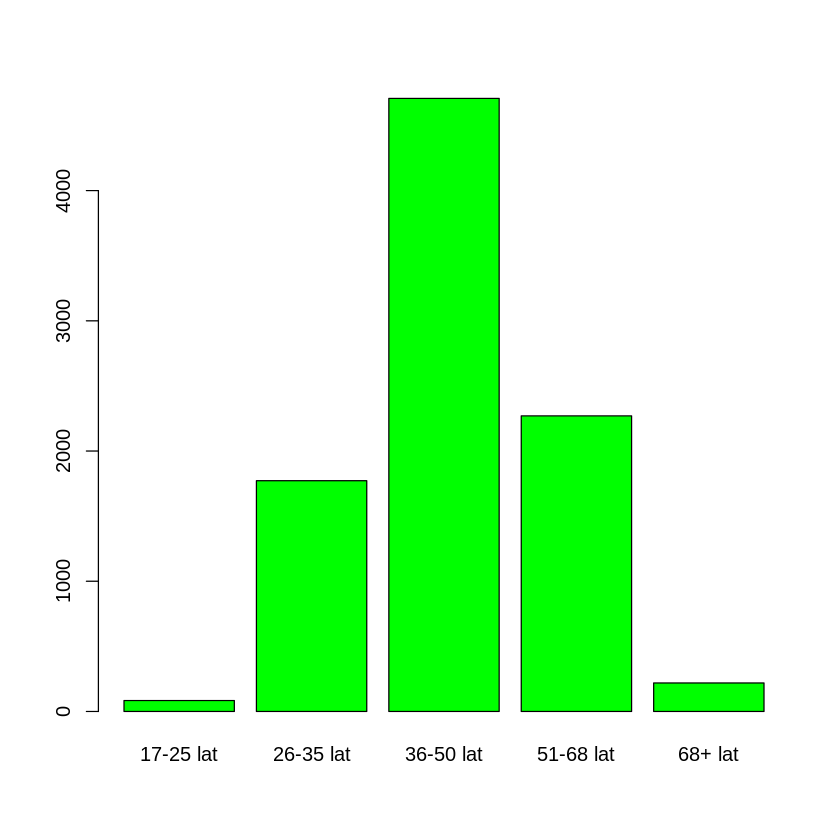

In [23]:
barplot(numbers, names.arg = age_ranges, col = "green")

## Analiza czasu pracy a zarobków
### Na tym wykresie przedstawiony mamy procentowy udział osób pracujących w poszczególnych zakresach godzinowych w tygodniu

**Na wykresie mamy wyraźnie przedstawione,że to właśnie osoby pracujące ponad 1 etat mają nawiększą szanse zarobić ponad $50k** 

In [24]:
numbers <- c()
hours <- c(0,20,40,60)
age_ranges <- c("0-20 h/week","21-40 h/week","40-60 h/week","61+/week")
for(i in 1:(length(hours)-1)){
    numbers <- append(x = numbers, values = count(filter(only_over_50k, hours.per.week>hours[i] & hours.per.week<hours[i+1]))$n)
}
numbers <- append(x = numbers, values = count(filter(only_over_50k, hours.per.week>80))$n)

In [25]:
numbers

[1]  171  723 3779   95

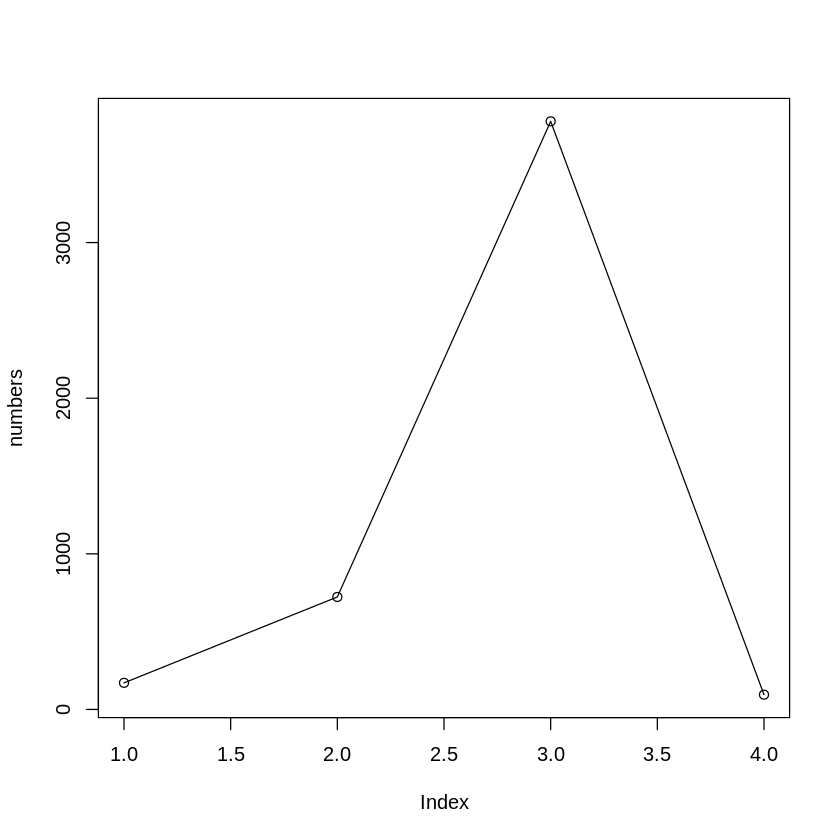

In [26]:
plot(numbers, type="o")